# Session 2.1: Pre-Class Work: Implementing M/D/1 Queue #


## Code and Simulation ##

#### Class Set-up (Queue and GroceryStore) ####

In [14]:
import heapq 
import matplotlib.pyplot as plt 
import scipy.stats as sts
import numpy as np


class Event: 
    '''
    Store the properties of one event in the Schedule class defined below. Each
    event has a time at which it needs to run, a function to call when running
    the event, along with the arguments and keyword arguments to pass to that
    function.
    '''
    def __init__(self, timestamp, function, *args, **kwargs):
        self.timestamp = timestamp
        self.function = function
        self.args = args
        self.kwargs = kwargs

    def __lt__(self, other):
        '''
        This overloads the less-than operator in Python. We need it so the
        priority queue knows how to compare two events. We want events with
        earlier (smaller) times to go first.
        '''
        return self.timestamp < other.timestamp

    def run(self, schedule):
        '''
        Run an event by calling the function with its arguments and keyword
        arguments. The first argument to any event function is always the
        schedule in which events are being tracked. The schedule object can be
        used to add new events to the priority queue.
        '''
        self.function(schedule, *self.args, **self.kwargs)
    
class Queue: 
    '''
    Implement an event schedule using a priority queue. You can add events and
    run the next event.
    
    The `now` attribute contains the time at which the last event was run.
    
    This class tracks the number of people in the queue
    and the number of people being served. It also 
    schedules when a customers starts being served and stops 
    being served (leaving the store)

    '''
    
    def __init__(self):
        self.now = 0  # Keep track of the current simulation time
        self.priority_queue = []  # The priority queue of events to run
    
    def add_event_at(self, timestamp, function, *args, **kwargs):
        # Add an event to the schedule at a particular point in time.
        heapq.heappush(
            self.priority_queue,
            Event(timestamp, function, *args, **kwargs))
    
    def add_event_after(self, interval, function, *args, **kwargs):
        # Add an event to the schedule after a specified time interval.
        self.add_event_at(self.now + interval, function, *args, **kwargs)
    
    def next_event_time(self):
        # Return the time of the next event. The `now` attribute of this class
        # contain the time of the last event that was run.
        return self.priority_queue[0].timestamp

    def run_next_event(self):
        # Get the next event from the priority queue and run it.
        event = heapq.heappop(self.priority_queue)
        self.now = event.timestamp
        event.run(self)
        
    def __repr__(self):
        return (
            f'Schedule() at time {self.now} ' +
            f'with {len(self.priority_queue)} events in the queue')
    
    def print_events(self):
        # Print out diagnostic information about the events in the schedule.
        print(repr(self))
        for event in sorted(self.priority_queue):
            print(f'   {event.timestamp}: {event.function.__name__}')

    

#### Run Function ####

In [ ]:
def run_simulation(arrival_rate, service_rate, run_until):
    """
    This function will run the M/D/1 queue simulation. 
    
    The M/D/1 queue model assumptions:
        - arrivial rate is exponentially distributed 
        - service times are deterministic (fixed)
        - 1 server 
        - no limit in queue length 
    
    Inputs:
        - arrival_rate 
        - service_rate
        - run_until 
        
    Outputs:
        - Printed statements of simulation
    """
    # Set up the exponential distributions for arrivals 
    arrival_distribution = sts.expon(scale=1/arrival_rate)
    
    queue = Queue() # Start with empty queue 
    next_arrival_time = arrival_distribution.rvs()  # Generate the first arrival
    
    # we add the first customer in our queue 
    queue.add_event_at(next_arrival_time, function)

    # We need at least 1 arrival before we can have departures so we set the
    # first departure time to infinity. This will be modified below.
    next_departure_time = np.inf 
    
    plot_data = {
    'time': [],
    'people_in_queue': []}
    
    while min(next_arrival_time, next_departure_time) < run_until:
        
        if next_arrival_time < next_departure_time:
            # Handle arrivals
            plot_data['time'].append(next_arrival_time)
            people_in_queue += 1
            if people_in_queue == 1:
                # We just went from an empty queue to 1 person and need to
                # generate the next departure time (because it is currently
                # infinity).
                assert next_departure_time == np.inf  # Sanity check
                next_departure_time = (
                    next_arrival_time + departure_distribution.rvs())
#                     next_arrival_time + departure_rate)

            # Generate the next arrival time
            next_arrival_time += arrival_distribution.rvs()
            
        else:
            # Handle departures
            plot_data['time'].append(next_departure_time)
            people_in_queue -= 1
            if people_in_queue == 0:
                # There is nobody in the queue so we should not generate a new
                # departure time.
                next_departure_time = np.inf
            else:
                # Generate the next departure time
                next_departure_time += departure_distribution.rvs()
#                 next_departure_time += departure_rate

        assert people_in_queue >= 0  # Sanity check
        plot_data['people_in_queue'].append(people_in_queue)
        
    # Make the plot of the queue length over time
    plt.figure()
    plt.title('Simulated queue length over time')
    plt.plot(plot_data['time'], plot_data['people_in_queue'], 'k.')
    plt.xlabel('time [s]')
    plt.ylabel('queue length')
    plt.show()
    

#### Attempt without the Scheduling function ####

In this code, I tried to visualize what the graph will look like with an M/D/1 model (where the service rate is deterministic/fixed) 

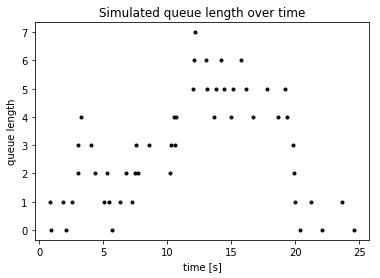

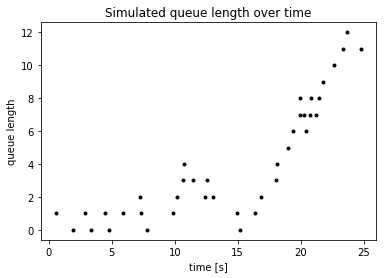

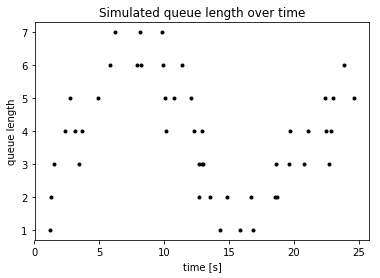

In [26]:
def run_experiment(arrival_rate, departure_rate, final_time):
    '''
    Run the queueing experiment for particular arrival and departure rates.
    This will make a plot of the number of people in the queue over time.
    
    Inputs:
    
        arrival_rate (float) The rate at which new people join the back of the
          queue. Units: people per second.
        
        departure_rate (float) The rate at which people are served and leave
          the queue. Units people per second.
        
        final_time (float) Until what time to run the simulation. When the next
        arrival and departure times are later than this, the simulation will
        end. Units: seconds.

    Returns: None
    '''

    # Set up the exponential distributions for arrivals and departures
    arrival_distribution = sts.expon(scale=1/arrival_rate)
#     departure_distribution = sts.expon(scale=1/departure_rate)


    people_in_queue = 0  # Start with an empty queue
    next_arrival_time = arrival_distribution.rvs()  # Generate the first arrival
    
    # We need at least 1 arrival before we can have departures so we set the
    # first departure time to infinity. This will be modified below.
    next_departure_time = np.inf  

    plot_data = {
        'time': [],
        'people_in_queue': []}
    
    while min(next_arrival_time, next_departure_time) < final_time:
        
        if next_arrival_time < next_departure_time:
            # Handle arrivals
            plot_data['time'].append(next_arrival_time)
            people_in_queue += 1
            if people_in_queue == 1:
                # We just went from an empty queue to 1 person and need to
                # generate the next departure time (because it is currently
                # infinity).
                assert next_departure_time == np.inf  # Sanity check
                next_departure_time = (
                    next_arrival_time + 1/departure_rate) #deterministic service rate 

            # Generate the next arrival time
            next_arrival_time += arrival_distribution.rvs()
            
        else:
            # Handle departures
            plot_data['time'].append(next_departure_time)
            people_in_queue -= 1
            if people_in_queue == 0:
                # There is nobody in the queue so we should not generate a new
                # departure time.
                next_departure_time = np.inf
            else:
                # Generate the next departure time
                next_departure_time += 1/departure_rate

        assert people_in_queue >= 0  # Sanity check
        plot_data['people_in_queue'].append(people_in_queue)
        
    # Make the plot of the queue length over time
    plt.figure()
    plt.title('Simulated queue length over time')
    plt.plot(plot_data['time'], plot_data['people_in_queue'], 'k.')
    plt.xlabel('time [s]')
    plt.ylabel('queue length')
    plt.show()
    
arrival_rate = 1
departure_rate = 1
run_until = 25

# Run the simulation 3 times to see different random results
for i in range(3):
	run_experiment(arrival_rate, departure_rate, run_until)

## Reflection (#PythonImplementation and #CodeReadability ) ## 

Apologies. I wasn't able to finish the pre-class work. I had a hard time implementing the classes into the main function "run_simulation". I became confused as to how we are to add the events using the queue given the exponentially distirbuted arrival time. 